# Data Science Pragmatic programming in NLP


**TODO** REVIEW

Add reference and code to spacy

Split in sections

1. Notes and terms

1. Text processing
    * regularexpression
    * string indexing schema
    
1. Text representations
    1. bag of words
    1. Embeedings
        * word2vec
        * BERT
        * GPT-2 and GPT-3
1. NLP tasks
    * NER
    * Part of Speech
    * Text summarization (The main idea of text)
    * chat bot
1. Languages
    * Find code related to other languages not English like stop word or Lemmatization for Portuguese   

1. speech to text (Maybe)

refs:
* https://medium.com/towards-artificial-intelligence/nlp-zero-to-hero-with-python-2df6fcebff6e

Code snippets for quick consult (copy n paste)

* NLP is really common because the majority of data on internet is text. Text is found everywhere indeed.
* It is pretty common to have un labeled data
* It is pretty common to have memory issue 
* Normally the histograms of word count is long tails distribution


In [2]:
import sys, os
import numpy as np
import pandas as pd

from scipy import stats

from nltk.corpus import movie_reviews as reviews
import utils as ut

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

import IPython
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
!pwd

## NLP notes and terms

### Short notes about string encode and string literals in python

ref:https://stackoverflow.com/questions/2081640/what-exactly-do-u-and-r-string-flags-do-and-what-are-raw-string-literals
Python 2 behavior is different form Python 3 that is more simple


* Python string literals

    * r'This is a string with / backslash.' (There is no escape character) 
        * The syntax "r" exist to make easy work with regex that is heavy in backslash 
    * u'This is a string with // backslash.' "/" is escape character 
    * b'This is bytecode string'. sequence of byte , similar to unicode in python 2.*. Bytecode are **machine readable**
         * you can encode and decode bytecodes
    


In [3]:
print('comparing size to show there is difference')
sys.getsizeof('ciao')
sys.getsizeof(u'ciao')
sys.getsizeof(r'ciao')

sys.getsizeof(b'ciao')

comparing size to show there is difference


53

53

53

37

**Unicode**

refs:
*  https://www.geeksforgeeks.org/byte-objects-vs-string-python/
* https://stackoverflow.com/questions/18034272/python-str-vs-unicode-types/18034409

The purpose of all this is to provide a means to unambiguously refer to a each character.

In [5]:
# initialising a String  
a = 'GeeksforGeeks'
sys.getsizeof(a)  

# initialising a byte object 
c = b'GeeksforGeeks'
sys.getsizeof(c)

# using encode() to encode the String 
# encoded version of a is stored in d 
# using ASCII mapping 
d = a.encode('ASCII') 
  
# checking if a is converted to bytes or not 
print(f"Encoding successful: {d}" if d ==c else "Encoding Unsuccessful" )
    
# using decode() to decode the Byte object 
# decoded version of c is stored in d 
# using ASCII mapping 
d = c.decode('ASCII') 
print("Decoding successful" if d ==a else "Decoding Unsuccessful" )

print()
print(c)
print(c.decode('utf-8'))

62

46

Encoding successful: b'GeeksforGeeks'
Decoding successful

b'GeeksforGeeks'
GeeksforGeeks


### NLP terms 

refs: https://www.kdnuggets.com/2017/02/natural-language-processing-key-terms-explained.html

1. corpora or corpus 
    * collection of text
1. semantics
    * semantcs = meaning of the text
1. stop words

    * They are words to be removed because they do not add information or contents to a sentence: Ex: "the", "and" and "a"
    
    * It is good to remove stop words:
        * Text Classification
            * Spam Filtering
            * Language Classification
            * Genre Classification
        * Caption Generation
        * Auto-Tag Generation

    * AVOID remove stop words:
        * **Small datastes** stop words can play a key role in connecting semantic meaning
        * Machine Translation
        * Language modelling 
        * Text Summarization

1. Tokenization

    * The process to convert long sentences in small pices called tokens (a word vsn be a token)

1. n-gram: bi-grams and tri-grams
1. skip_gram
1. Stemming

    * process to reduce worfds variations: run, runs, runnig and ran is map to run. "tradition" and "traditional" has the sma stem "tradit"
    
1. Lemmatization

    * same idea as Stemming but capture a little bit of meaning. Ex: better, good, awsome can be map to good
    
1. simillarity measures

    * jaccard
    * leveintein or edit distance
    
1. tfidf = tf * idf

    * tf: term frequency, which measures how frequently a term occurs in a document. Is a local metric and measure how important is the term for that sentence. it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length.
    
    * idf: inverse of docment (document contains the term) frequency. Is a global metric (relative to the corpus). Gives how unique is an specific term

$
idf(t) = log \left ( \frac{\text{Number of docs}}{\text{Number of documents with term t in it}} \right) 
$


sciki-learn definition of idf differs form the majority of text books.
See http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction

$
idf(t) = log ( \frac{1 + n}{ 1+ df(t)} ) + 1
$

And then idf is nomralized using eucledian norm

$
v_{norm} = \frac{v_k}{\sqrt{ \sum_i v_i^2 }}
$


### Note about large vocabulary and memory issue 

Because is so common to have a large vocabulary it is normal to have memmory issue. 


You can minimize the memory problem and also is good for modelling by minimizing the corpus vocabulary. Things you can do:

1. Clean and remove stop words

1. Stemming and Lemmatization 
    
    Reduce the total number of unique words in the dictionary. As a result, the number of columns in the document-word matrix (created by CountVectorizer in the next step)


Another way is working with Sparse matrix and machine learning implementation that support Sparse matrix like the sparse matrix implemented in **scipy.sparse** and the machine learnig in scikit-learn.


refs: https://docs.scipy.org/doc/scipy/reference/sparse.html


In [3]:
import sys
from scipy.sparse import csr_matrix

sA = csr_matrix([[1.1, 2., 0.0], [0, 0, 3.0], [4, 0.0, 5]])
sA.count_nonzero()
print(sA)

# convert to dense numpy array
A = sA.toarray()
A

# Return the size of an object in bytes
print('size: {} bytes'.format(sys.getsizeof(sA)))
print('size: {} bytes'.format(sys.getsizeof(A)))

## All matrix manipulation is still avaliable
B = np.array([[1,0,0],[0,1,0]])
B

# convert numpy arary to sparse
sB = csr_matrix(B) 
sB
print(type(sB))
print(sB)

## TODO How to get list of coordinates and values like in print
coo = sA.tocoo()


## index
indices = np.mat([coo.row, coo.col]).transpose()

indices

## values
coo.data

## all together
np.mat([coo.row, coo.col, coo.data]).transpose()

5

  (0, 0)	1.1
  (0, 1)	2.0
  (1, 2)	3.0
  (2, 0)	4.0
  (2, 2)	5.0


array([[1.1, 2. , 0. ],
       [0. , 0. , 3. ],
       [4. , 0. , 5. ]])

size: 64 bytes
size: 184 bytes


array([[1, 0, 0],
       [0, 1, 0]])

<2x3 sparse matrix of type '<class 'numpy.int64'>'
	with 2 stored elements in Compressed Sparse Row format>

<class 'scipy.sparse.csr.csr_matrix'>
  (0, 0)	1
  (1, 1)	1


matrix([[0, 0],
        [0, 1],
        [1, 2],
        [2, 0],
        [2, 2]], dtype=int32)

array([1.1, 2. , 3. , 4. , 5. ])

matrix([[0. , 0. , 1.1],
        [0. , 1. , 2. ],
        [1. , 2. , 3. ],
        [2. , 0. , 4. ],
        [2. , 2. , 5. ]])

## Text processing

### Regular expression

### String manipuations

* indexing schema
* lower
* contains 
* iterate over sentence


### Pandas string column manipulations 

## Text representations

### Bag of words

### tf-idf

### Embeddings


* word2vec
* BERT
*GPT-2 and GPT-3

## Data wrangling

### Get some data

```python
import nltk

nltk.download('movie_reviews')
```


In [4]:
X = [reviews.raw(fileid) for fileid in reviews.fileids()]
y = [reviews.categories(fileid)[0] for fileid in reviews.fileids()]

In [5]:
y[1]
X[1]

'neg'

'the happy bastard\'s quick movie review \ndamn that y2k bug . \nit\'s got a head start in this movie starring jamie lee curtis and another baldwin brother ( william this time ) in a story regarding a crew of a tugboat that comes across a deserted russian tech ship that has a strangeness to it when they kick the power back on . \nlittle do they know the power within . . . \ngoing for the gore and bringing on a few action sequences here and there , virus still feels very empty , like a movie going for all flash and no substance . \nwe don\'t know why the crew was really out in the middle of nowhere , we don\'t know the origin of what took over the ship ( just that a big pink flashy thing hit the mir ) , and , of course , we don\'t know why donald sutherland is stumbling around drunkenly throughout . \nhere , it\'s just " hey , let\'s chase these people around with some robots " . \nthe acting is below average , even from the likes of curtis . \nyou\'re more likely to get a kick out of h

### Summarize data


* bag of words
* tfidf 


In [6]:
import text_utils as tut

In [7]:
!pygmentize text_utils.py

# * *************************************************************************
#   Programmer[s]: Leandro Fernandes
#   email: leandroohf@gmail.com
#   Program: text_utils
#   Commentary: My utils for helping with text processing
#   Date: February 6, 2020
#
#   The author believes that share code and knowledge is awesome.
#   Feel free to share and modify this piece of code. But don't be
#   impolite and remember to cite the author and give him his credits.
# * *************************************************************************

import numpy as np
import pandas as pd

import string

from nltk import word_tokenize
from nltk.tokenize import RegexpTokenizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from typing import List, Optional


def get_max_word_len(sentence: str):

    s1 = word_tokenize(sentence)
    sentence_len = len(s1)

    len_of_largest_word = 0
    largest_word = ''
    # O(n)
    for word 

* **Get the big picture**

In [8]:
%%time 

corpus_df = tut.create_corpus_table(X)
corpus_df.head(3)

CPU times: user 21.6 s, sys: 54.3 ms, total: 21.7 s
Wall time: 21.7 s


,doc,largest_word,len_of_largest_word,doc_len,words
0,"plot : two teen couples go to a church party ,...",disappearances,14,841,"[plot, two, teen, couples, go, to, a, church, ..."
1,the happy bastard's quick movie review \ndamn ...,strangeness,11,291,"[the, happy, bastard, s, quick, movie, review,..."
2,it is movies like these that make a jaded movi...,unfortunately,13,562,"[it, is, movies, like, these, that, make, a, j..."


In [9]:
%%time

word_summary, doc_summary = tut.summarize_corpus(corpus_df)

doc_summary

CPU times: user 136 ms, sys: 4 ms, total: 140 ms
Wall time: 139 ms


,n_docs,min_doc_len,mean_doc_len,median_doc_len,max_doc_len
0,2000,18,762.5195,712.5,2753


In [10]:
word_summary

,n_words,vocab_size,largest_word,len_of_largest_word
0,1336782,39696,dead-guy-seems-to-have-come-back-to-life-but-t...,79


* **Work with toy example** 

In [11]:
X_toy = [
        'plot: attempt movie, movie',
        'plot: it is movie like these that make a jaded movie viewer thankful for the invention of the timex indiglo watch',
        'plot: it is clear that the film'
         ]
X_toy

['plot: attempt movie, movie',
 'plot: it is movie like these that make a jaded movie viewer thankful for the invention of the timex indiglo watch',
 'plot: it is clear that the film']

In [12]:
word_freq_df = tut.get_word_frequency_table(X_toy, stop_words='english')
word_freq_df.head(11)

,word_freq,word
8,4,movie
9,3,plot
0,1,attempt
1,1,clear
2,1,film
3,1,indiglo
4,1,invention
5,1,jaded
6,1,like
7,1,make


In [13]:
word_freq_df = tut.get_word_frequency_table(X, stop_words='english')
word_freq_df.head(11)

,word_freq,word
13085,9517,film
22959,5771,movie
20351,3690,like
19034,2905,just
14895,2411,good
35358,2411,time
33490,2169,story
5961,2020,character
5973,1859,characters
38204,1693,way


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f029ca18790>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f029c6cf790>]],
      dtype=object)

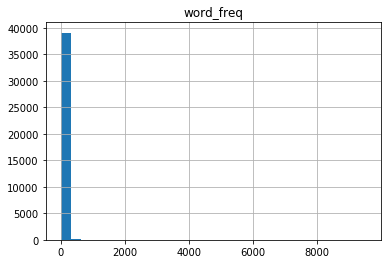

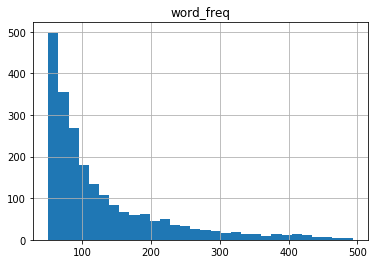

In [14]:
# It is long tail distribution
word_freq_df.hist(column="word_freq",bins=30)

# Just see ROI
word_freq_df[(word_freq_df.word_freq < 500) & (word_freq_df.word_freq > 50)].hist(column="word_freq",bins=30)

In [15]:
doc_freq_df = tut.get_doc_frequency_by_word_table(X_toy, stop_words='english')

doc_freq_df.head(5)

,doc_freq,df,word
9,3,1.000000,plot
8,2,0.666667,movie
0,1,0.333333,attempt
1,1,0.333333,clear
2,1,0.333333,film


In [ ]:
# Fixme: Code to summarize sparse matrix is broken after change form numpy to sparse matrix representation 
tfidf_df = tut.get_tfidf_table(X_toy, stop_words='english')

tfidf_df.head(5)

In [ ]:
## Help to debug the function
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')

# sparse matrix
# doc x word matrix
# #docs, #words = X.shape
bag_of_tfidf = vectorizer.fit_transform(X_toy)

print(bag_of_tfidf.shape)

bag_of_tfidf.toarray()

words = vectorizer.get_feature_names()

tfidf_df = pd.DataFrame({'words': words,
                         'min': bag_of_tfidf.min(axis=0),
                         'mean': bag_of_tfidf.mean(axis=0),
                         #'median': bag_of_tfidf.median(axis=0),
                         'max': bag_of_tfidf.max(axis=0)})



# sort by frequency of word
tfidf_df.sort_values(by='max',ascending=False, inplace=True)


### Tokenize

#### words

In [26]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

# tokenize one sentence
x1_tokens = tokenizer.tokenize(X[1])

len(x1_tokens)
x1_tokens[0:11]

# return maps 
tokens = map(lambda s: tokenizer.tokenize(s),X)

tokens_list = list(tokens)

# convert to list of list
len(tokens_list)
tokens_list[0:2]

253

['the',
 'happy',
 'bastard',
 's',
 'quick',
 'movie',
 'review',
 'damn',
 'that',
 'y2k',
 'bug']

2000

[['plot',
  'two',
  'teen',
  'couples',
  'go',
  'to',
  'a',
  'church',
  'party',
  'drink',
  'and',
  'then',
  'drive',
  'they',
  'get',
  'into',
  'an',
  'accident',
  'one',
  'of',
  'the',
  'guys',
  'dies',
  'but',
  'his',
  'girlfriend',
  'continues',
  'to',
  'see',
  'him',
  'in',
  'her',
  'life',
  'and',
  'has',
  'nightmares',
  'what',
  's',
  'the',
  'deal',
  'watch',
  'the',
  'movie',
  'and',
  'sorta',
  'find',
  'out',
  'critique',
  'a',
  'mind',
  'fuck',
  'movie',
  'for',
  'the',
  'teen',
  'generation',
  'that',
  'touches',
  'on',
  'a',
  'very',
  'cool',
  'idea',
  'but',
  'presents',
  'it',
  'in',
  'a',
  'very',
  'bad',
  'package',
  'which',
  'is',
  'what',
  'makes',
  'this',
  'review',
  'an',
  'even',
  'harder',
  'one',
  'to',
  'write',
  'since',
  'i',
  'generally',
  'applaud',
  'films',
  'which',
  'attempt',
  'to',
  'break',
  'the',
  'mold',
  'mess',
  'with',
  'your',
  'head',
  'and',
  

#### Sentence

In [27]:
# Create text
string = "The science of today is the technology of tomorrow. Tomorrow is today."

sent_tokenize(string)

['The science of today is the technology of tomorrow.', 'Tomorrow is today.']

### Clean data in nlp

refs: https://chrisalbon.com/#articles

* remove punctuation
* remove stop words

#### Remove punctuaion

In [41]:
text_data = ['Hi!!!! I. Love. This. Song....', 
             '10000% Agree!!!! #LoveIT', 
             'Right?!?!']

# Apply function
[tut.remove_punctuation(sentence) for sentence in text_data]

['Hi I Love This Song', '10000 Agree LoveIT', 'Right']

#### Stop words

In [21]:
# Load library
from nltk.corpus import stopwords

# Load stop words
stop_words = stopwords.words('english')

# Remove stop words
x1_tokens_1 = [word for word in x1_tokens if word not in stop_words]
len(x1_tokens_1)

print('Removed {} words'.format(len(x1_tokens) -len(x1_tokens_1)))

129

Removed 124 words


#### Stemming Words

In [42]:
# Load library
from nltk.stem.porter import PorterStemmer

# Create word tokens
tokenized_words = ['i', 'am', 'humbled', 'by', 'this', 'traditional', 'meeting', 'tradition']

# Create stemmer
porter = PorterStemmer()

# Apply stemmer
[porter.stem(word) for word in tokenized_words]

['i', 'am', 'humbl', 'by', 'thi', 'tradit', 'meet', 'tradit']

#### Lemmatization

refs: 

```python
import nltk
nltk.download('wordnet')
```


In [36]:
## TODO: Review
from nltk.stem.wordnet import WordNetLemmatizer

lemma = WordNetLemmatizer()

# Apply lemma
[lemma.lemmatize(word) for word in tokenized_words]

['i', 'am', 'humbled', 'by', 'this', 'traditional', 'meeting', 'tradition']

## Part of Speech

```python
import nltk
nltk.download('averaged_perceptron_tagger')
```

| Tag | Part Of Speech                     |
|---- | -----------------------------------|
| NNP | Proper noun, singular              |
| NN  | Noun, singular or mass             |
| RB  | Adverb                             |
| VBD | Verb, past tense                   |
| VBG | Verb, gerund or present participle |
| JJ  | Adjective                          |
| PRP | Personal pronoun                   |


In [40]:
from nltk import pos_tag
from nltk import word_tokenize

text_data = "Chris loved outdoor running"

# Use pre-trained part of speech tagger
text_tagged = pos_tag(word_tokenize(text_data))

# Show parts of speech
text_tagged

[('Chris', 'NNP'), ('loved', 'VBD'), ('outdoor', 'RP'), ('running', 'VBG')]

## Text summarization

The main idea of a text

## NER

## BERT 

TODO: Move this scetion to machine_learnin repo

refs: http://jalammar.github.io/illustrated-bert/

TODO: ADD Code to do 


   
1. BERT Google release in 2018 and beat all the previous model   <= #A very important
1. use wrodvec
1. glove

for help with BERT
https://blog.insightdatascience.com/using-bert-for-state-of-the-art-pre-training-for-natural-language-processing-1d87142c29e7

https://towardsdatascience.com/bert-explained-state-of-the-art-language-model-for-nlp-f8b21a9b6270

clone bert
git clone https://github.com/google-research/bert.git


Use kaglle competition (Good example of multi-label calssifier)
https://medium.com/huggingface/multi-label-text-classification-using-bert-the-mighty-transformer-69714fa3fb3d

Yuo can get the data from kaggle
https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/overview


https://towardsdatascience.com/bert-explained-state-of-the-art-language-model-for-nlp-f8b21a9b6270

* BERT uses the idea of Transformers: Encoder + ~~Decoder~~ does not need decoder
* BERT does not work durectional like RNN. Process from left to right. The transformer reads the entore sentence at once. Because of that, It has the hability to learn the context of a word based on the entire surround.

* Many models predict the next word in a sequence (e.g. “The child came home from ___”), a directional approach which inherently limits context learning. To overcome this challenge, BERT uses two training strategies:

    1. Masked LM (MLM)
    1. Next Sentence Prediction (NSP)

----------------------
**MLM**

* NN is feed if sentences. In a sentence some words are labels as ```<MASK>``` and the goal of the NN is learn how to predict <MASK> based on the context of the other words in the sentence. **Word2Vec** works similar but with **skipgrams**

* The BERT loss function takes into consideration only the prediction of the masked values and ignores the prediction of the non-masked words. As a consequence, the model converges slower than directional models, 
    

------
    
**Aplication**

1. Sentiment Analysis: 
    * input: Movie/Product review. Output: is the review positive or negative?
    * Example dataset: [SST](https://nlp.stanford.edu/sentiment/)
    
    

<img src="images/BERT-classification-spam.png" width="800" height="400">


1. NER: Name Entity Recognition (is a Person, Organization, Date, etc)
    

1. Classifications adding one more layer or feed a new classifier with the embedding as input
    
    
1. **Fact checking**:
    * Input: sentence. Output: “Claim” or “Not Claim”
    * More ambitious/futuristic example:
    * Input: Claim sentence. Output: “True” or “False”
    * Full Fact is an organization building automatic fact-checking tools for the benefit of the public. Part of their pipeline is a classifier that reads news articles and detects claims (classifies text as either “claim” or “not claim”) which can later be fact-checked (by humans now, with ML later, hopefully).
Video: Sentence embeddings for automated factchecking - Lev Konstantinovskiy.

-------------
    
**Take away** 
    
    
* **Model size matters**, even at huge scale. BERT_large, with 345 million parameters, is the largest model of its kind. It is demonstrably superior on small-scale tasks to BERT_base, which uses the same architecture with “only” 110 million parameters.
    
    
* **With enough training data**, more training steps == higher accuracy. For instance, on the MNLI task, the BERT_base accuracy improves by 1.0% when trained on 1M steps (128,000 words batch size) compared to 500K steps with the same batch size.
    
* **BERT’s bidirectional approach (MLM) converges slower** than left-to-right approaches (because only 15% of words are predicted in each batch) but bidirectional training still outperforms left-to-right training after a small number of pre-training steps.
    
    